<center> <img src='https://thecreditpros.com/wp-content/uploads/2017/05/Credit-Offers-1.jpg'> </center>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers/BankChurners.csv


# 1.Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r'/kaggle/input/credit-card-customers/BankChurners.csv')

In [4]:
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [5]:
pd.set_option('display.max_columns', None)#to view all the columns
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# 2. Exploratory Data Analysis

In [6]:
#renaming some columns 
df = df.rename(columns={'CLIENTNUM': 'phone', 'Customer_Age': 'age', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'naive_bayes_month_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'naive_bayes_month_2'})

In [7]:
df.head()

,phone,Attrition_Flag,age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,naive_bayes_month_1,naive_bayes_month_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [8]:
df.describe()#descriptive summary

,phone,age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,naive_bayes_month_1,naive_bayes_month_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


credit limit, avg oepn to buy, total_trans_amt seems to have outliers

In [9]:
df.isnull().sum()#checking for null or missing values

phone                       0
Attrition_Flag              0
age                         0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
naive_bayes_month_1         0
naive_bayes_month_2         0
dtype: int64

there are no null/missing values SIGH!

In [10]:
#attrition flag is our target variable
df["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

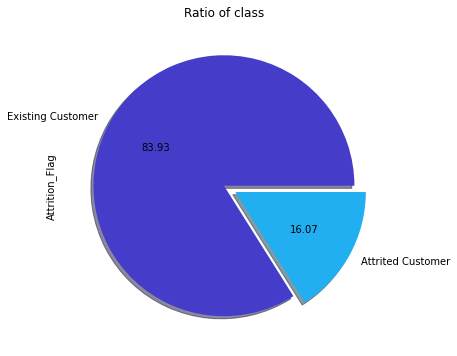

In [11]:
colors=('#453CC9', '#22AFF1')
explode=[0,0.1]
df["Attrition_Flag"].value_counts().plot(kind='pie',shadow=True,explode=explode,colors=colors,autopct='%.2f',figsize=(8,6))
plt.title('Ratio of class')
plt.show()

We can see that there are very few rows for 'attrited customer' we might need to oversample the data

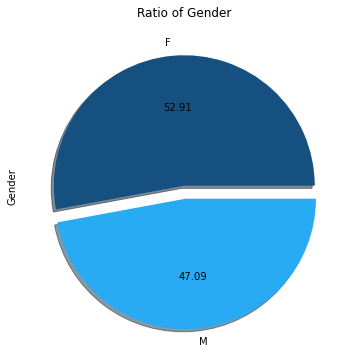

In [12]:
colors=('#165081', '#29ABF4')
explode=[0,0.1]
df["Gender"].value_counts().plot(kind='pie',shadow=True,explode=explode,colors=colors,autopct='%.2f',figsize=(8,6))
plt.title('Ratio of Gender')
plt.show()

We can see that there are more number of female who uses the card than males

Text(0.5, 1.0, 'Frequency of Education')

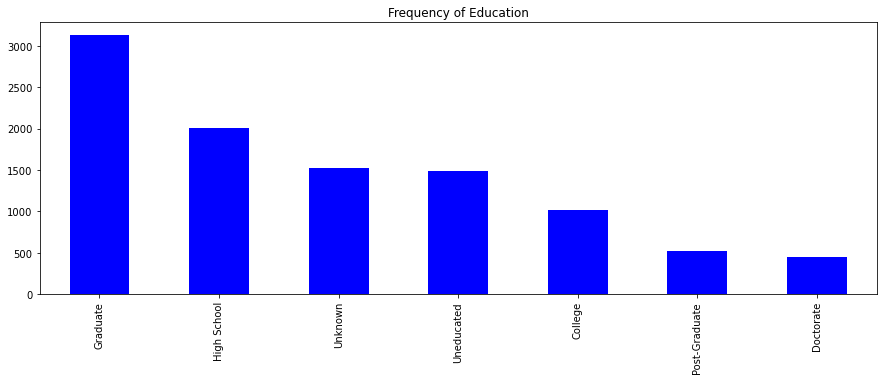

In [13]:
df['Education_Level'].value_counts().plot(kind='bar',colormap='winter',figsize=(15,5))
plt.title('Frequency of Education')

We can see that graduate holds the maximum no of credit cards followed by high school 

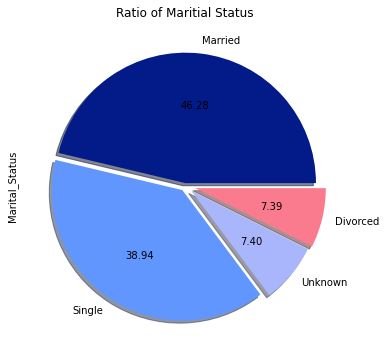

In [14]:
colors=('#031B88', '#6096FD', '#AAB6FB','#FB7B8E')
explode=[0.02,0.04,0.06,0.08]
df["Marital_Status"].value_counts().plot(kind='pie',shadow=True,explode=explode,colors=colors,autopct='%.2f',figsize=(8,6))
plt.title('Ratio of Maritial Status')
plt.show()

Married people use the credit card more than single people followed by unknown.

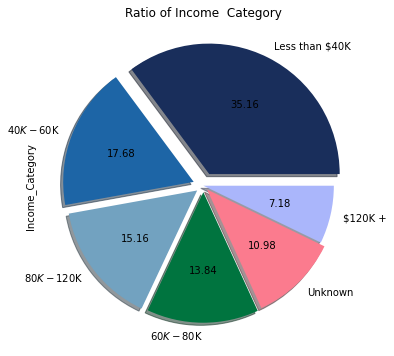

In [15]:
colors=('#192e5b', '#1d65a6', '#72a2c0','#00743f','#FB7B8E','#AAB6FB')
explode=[0.1,0.08,0.06,0.05,0.04,0]
df["Income_Category"].value_counts().plot(kind='pie',shadow=True,explode=explode,colors=colors,autopct='%.2f',figsize=(8,6))
plt.title('Ratio of Income  Category')
plt.show()

We can see that the people with less income are the ones who uses credit card the most

In [16]:
df.head()

,phone,Attrition_Flag,age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,naive_bayes_month_1,naive_bayes_month_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [17]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

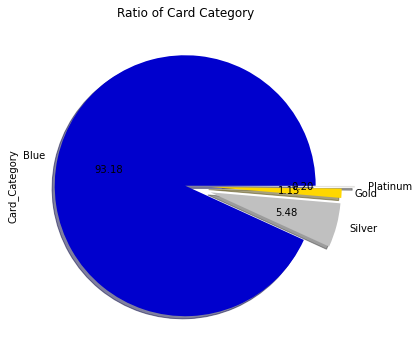

In [18]:
colors=('#0000CD', '#C0C0C0', '#FFD700','#e5e4e2')
explode=[0,0.2,0.2,0.3]
df["Card_Category"].value_counts().plot(kind='pie',shadow=True,explode=explode,colors=colors,autopct='%.2f',figsize=(8,6))
plt.title('Ratio of Card Category')
plt.show()

Blue cardholders are maximum.

In [19]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [20]:
#encoding categorical columns
df['Attrition_Flag']=df['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer':1})
df['Gender']=df['Gender'].replace({'M':1,'F':0})
df['Education_Level']=df['Education_Level'].replace({'Uneducated':0, 'High School':1, 'College':2, 'Graduate':3, 'Post-Graduate':4, 'Doctorate':5, 'Unknown':6})
df['Marital_Status']=df['Marital_Status'].replace({'Single':0, 'Married':1, 'Divorced':2, 'Unknown':3})
df['Income_Category']=df['Income_Category'].replace({'Less than $40K':0, '$40K - $60K':1, '$60K - $80K':2, '$80K - $120K':3, '$120K +':4, 'Unknown':5})
df['Card_Category']=df['Card_Category'].replace({'Blue': 0, 'Silver':1,'Gold':2,'Platinum':3})

In [21]:
df.dtypes#verifying dtypes

phone                         int64
Attrition_Flag                int64
age                           int64
Gender                        int64
Dependent_count               int64
Education_Level               int64
Marital_Status                int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
naive_bayes_month_1         float64
naive_bayes_month_2         float64
dtype: object

<AxesSubplot:title={'center':'Correlation between variables'}>

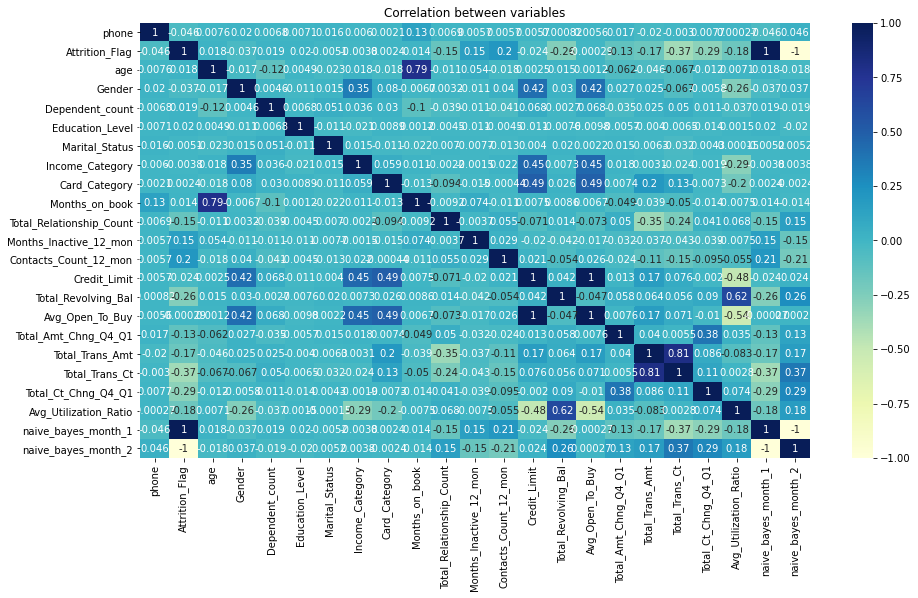

In [22]:
plt.subplots(figsize=(15,8))
plt.title('Correlation between variables')
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

array([[<AxesSubplot:title={'center':'phone'}>,
        <AxesSubplot:title={'center':'Attrition_Flag'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>],
       [<AxesSubplot:title={'center':'Education_Level'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>,
        <AxesSubplot:title={'center':'Income_Category'}>,
        <AxesSubplot:title={'center':'Card_Category'}>,
        <AxesSubplot:title={'center':'Months_on_book'}>],
       [<AxesSubplot:title={'center':'Total_Relationship_Count'}>,
        <AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>,
        <AxesSubplot:title={'center':'Total_Revolving_Bal'}>],
       [<AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplo

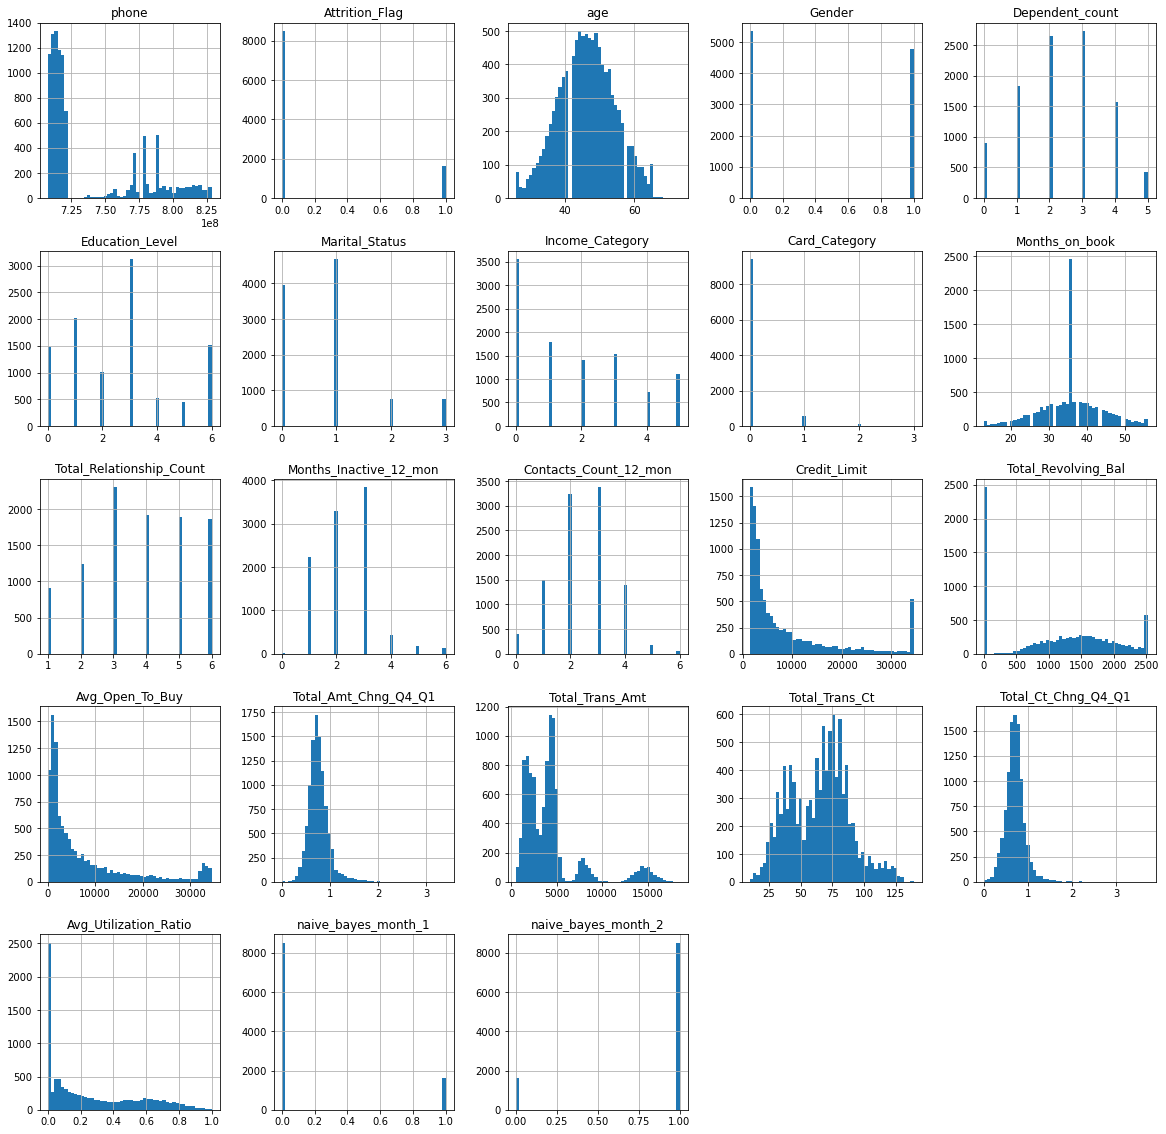

In [23]:
df.hist(bins=50, figsize=(20,20))

In [24]:
#dropping unncecessary columns
df.drop(['naive_bayes_month_1','naive_bayes_month_2'], axis =1, inplace=True)

In [25]:
df.shape

(10127, 21)

# 3. Splitting data into train and test,scaling and oversampling

In [26]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [27]:
df.columns

Index(['phone', 'Attrition_Flag', 'age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [28]:
X=df[['phone', 'age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
y=df['Attrition_Flag']

In [29]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [30]:
# 80% training set 20% percent test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=True)

In [31]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [32]:
print('Shape of Training data: ',X_train.shape, y_train.shape,
     'Shape of test data: ',X_test.shape, y_test.shape)

Shape of Training data:  (13600, 20) (13600,) Shape of test data:  (3400, 20) (3400,)


# 4. Model Building

## 4.1 Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score

In [34]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [35]:
lr_pred=lr.predict(X_test)

In [36]:
print('F1-Score: ',f1_score(y_test,lr_pred))

F1-Score:  0.8783702816057519


In [37]:
print('Report: ',classification_report(y_test,lr_pred))

Report:                precision    recall  f1-score   support

           0       0.88      0.88      0.88      1733
           1       0.88      0.88      0.88      1667

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400



In [38]:
confusion_matrix(y_test,lr_pred)

array([[1528,  205],
       [ 201, 1466]])

In [39]:
accuracy_score(y_test,lr_pred)

0.8805882352941177

## 4.2 Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
#after pruning
dt=DecisionTreeClassifier(criterion='entropy',max_depth=11)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [42]:
dt_pred=dt.predict(X_test)

In [43]:
print('Report: ',classification_report(y_test,dt_pred))

Report:                precision    recall  f1-score   support

           0       0.95      0.93      0.94      1733
           1       0.93      0.95      0.94      1667

    accuracy                           0.94      3400
   macro avg       0.94      0.94      0.94      3400
weighted avg       0.94      0.94      0.94      3400



In [44]:
print('Accuracy: ',accuracy_score(y_test,dt_pred))


Accuracy:  0.94


In [45]:
confusion_matrix(y_test,dt_pred)

array([[1620,  113],
       [  91, 1576]])

### 4.2.1 Decision Tree Pruning

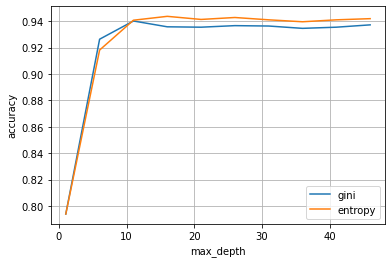

In [46]:
#decision tree pruning
max_depth=[]
acc_gini=[]
acc_entropy=[]
for i in range(1,50,5):
    dtree=DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(X_train,y_train)
    pred=dtree.predict(X_test)
    
    acc_gini.append(accuracy_score(y_test,pred))
    
    dtree=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dtree.fit(X_train,y_train)
    pred=dtree.predict(X_test)
    
    acc_entropy.append(accuracy_score(y_test,pred))
    
    max_depth.append(i)
    
    d=pd.DataFrame({'acc_gini': pd.Series(acc_gini),
                   'acc_entropy': pd.Series(acc_entropy),
                   'max_depth': pd.Series(max_depth)})
    
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.grid()
plt.legend()

### criterion= 'entropy' and max _depth=11 gives the accuracy upto 95%


<table >
  <tr>
    <th>Accuracy before pruning</th>
    <th>Accuracy after pruning</th> 
  
  </tr>
  <tr>
    <td>93 %</td>
    <td>94 %</td>
  </tr>
  
</table>

## 4.3 Random Forest


In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
rf_pred=rf.predict(X_test)

In [50]:
print('Report: ',classification_report(y_test,rf_pred))

Report:                precision    recall  f1-score   support

           0       0.98      0.96      0.97      1733
           1       0.96      0.98      0.97      1667

    accuracy                           0.97      3400
   macro avg       0.97      0.97      0.97      3400
weighted avg       0.97      0.97      0.97      3400



In [51]:
confusion_matrix(y_test,rf_pred)

array([[1668,   65],
       [  36, 1631]])

# 5. Result Comparison

<table >
  <tr>
    <th>Algorithm</th>
    <th>Accuracy</th> 
  
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>88.6 %</td>
  </tr>
    <tr>
    <td>Decision Tree</td>
    <td>94 %</td>
  </tr>
    <tr>
    <td>Random Forest </td>
    <td>97 %</td>
  </tr>
  
</table>
<br>
<br>
<center> Out of all Random Forest outperformed other algorithms with accuracy of 97%<center>

# <center> Thank you! </center>